# __Visualización para análisis exporatorio__
# AE09. Seaborn Stripplot y Swarmplot

En este notebook veremos dos tipos de gráficas de `Seaborn` las cuales son excelentes alternativas para hacer gráficas categóricas utilizando puntos.

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
sns.__version__ # Revisamos que estemos en la ultima versión de seaborn

'0.12.2'

In [3]:
# Importamos las librerías adicionales para el manejo numérico y de DataFrame
import numpy as np
import pandas as pd

In [4]:
sns.set(context='notebook',style='darkgrid',palette='dark')

En este caso, ahora en adelante todos los gráficos que utilicemos van a tener el formato que nosotros definimos con el método `sns.set()`

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
#penguins_df = pd.read_csv("/content/drive/MyDrive/VGroup/Viz/Archivos/VD02.csv").dropna()
penguins_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Análisis Exploratorio y Estadística/Clase 3/Copia de VD02.csv").dropna()
penguins_df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male


## <font color='blue'>__Gráficas stripplot__</font>

El método `sns.stripplot` sitúa la variable categórica en el eje `x` y la variable cuantitativa en el eje `y`, mostrando con un punto cada uno de los valores. Para poder distinguir los puntos en el caso de que estén muy próximos, por defecto, se aplica un "temblor" (jitter) a los puntos para separarlos del eje vertical de forma aleatoria:

[Documentación stripplot](https://seaborn.pydata.org/generated/seaborn.stripplot.html?highlight=stripplot#seaborn.stripplot)


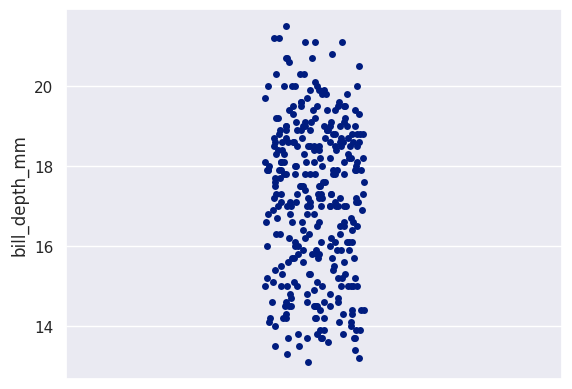

In [ ]:
sns.stripplot(y ='bill_depth_mm', data=penguins_df)
plt.show()

ejemplo de un cambio en el parámetro `jitter`:

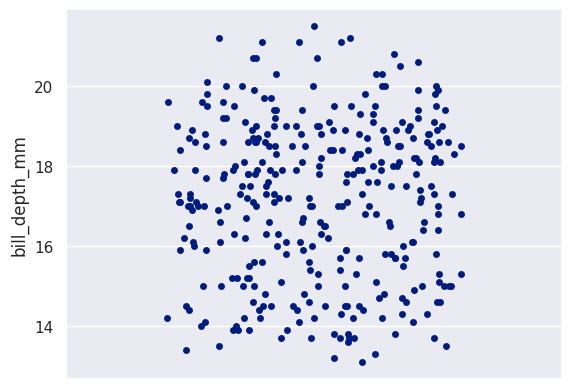

In [ ]:
sns.stripplot(y ='bill_depth_mm', data=penguins_df, jitter=0.3)
plt.show()

Podemos adicionar valores categóricos para realizar la separación de los puntos según categoría.

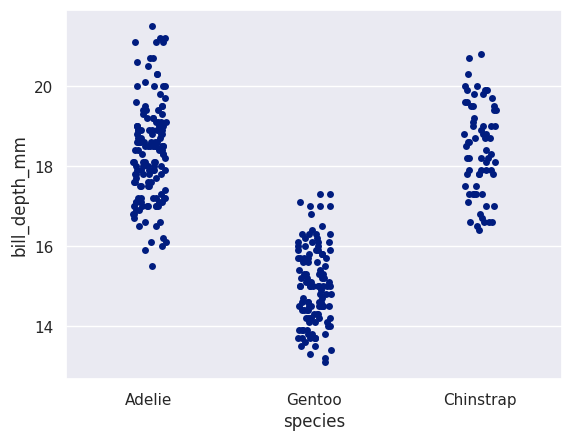

In [ ]:
sns.stripplot(x='species',y ='bill_depth_mm', data=penguins_df,)
plt.show()

## <font color='blue'>__Gráficas swarmplot__</font>

El segundo método corresponde a `swarmplot` (gráfico de enjambre). Para poder realizar este gráfico hay que utilizar el método `sns.swarmplot`, el cual genera gráficos semejantes a los generados por `sns.stripplot`, pero aplicando a la posición de los puntos cierto algoritmo de forma que no solapen. Esto ofrece una mejor visualización a costa de dejar de ser útil para conjuntos de datos muy grandes:

[Documentación Swarmplot](https://seaborn.pydata.org/generated/seaborn.swarmplot.html?highlight=swarmplot#seaborn.swarmplot)


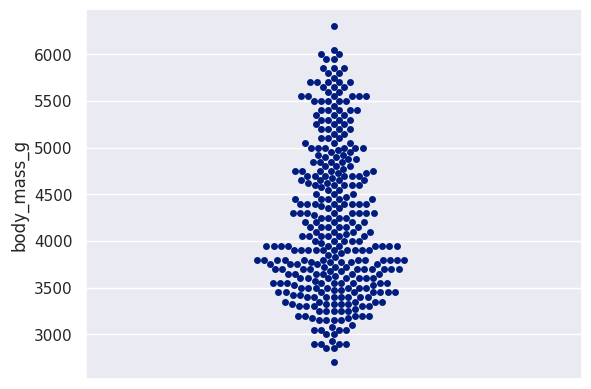

In [ ]:
sns.swarmplot(y ='body_mass_g', data=penguins_df)
plt.show()

Podemos adicionar valores categóricos para realizar la separación de los puntos según categoría. (de la misma forma que el stripplot)

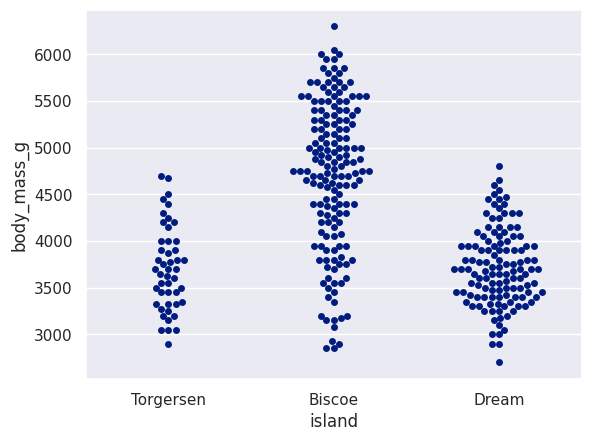

In [ ]:
sns.swarmplot(x='island',y ='body_mass_g', data=penguins_df)
plt.show()

Y recordar que también podemos pintar los puntos, dependiendo de alguna columna de nuestro interés

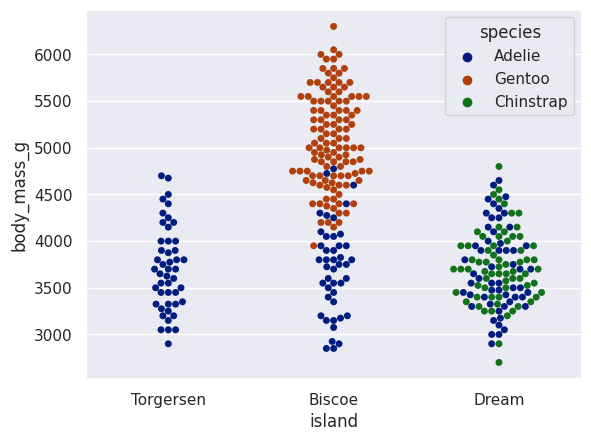

In [ ]:
sns.swarmplot(x='island',y ='body_mass_g', data=penguins_df, hue="species")
plt.show()

Se puede dibujar un diagrama de enjambre por sí solo, pero también es un buen complemento para un diagrama de caja o violín en los casos en los que desee mostrar todas las observaciones junto con alguna representación de la distribución subyacente.

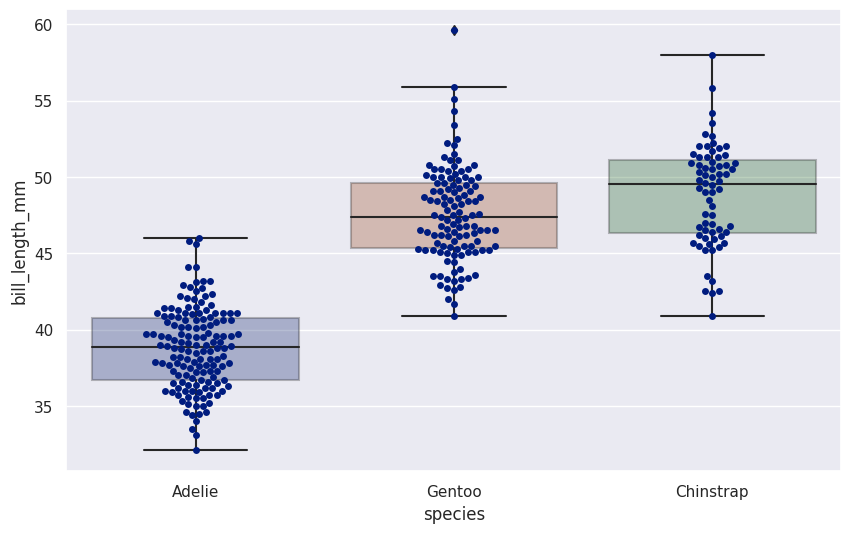

In [ ]:
# Para una mejor visualización le damos transparencia al boxplot, sin embargo, este método
# no tiene definido el parámetro 'alpha' en la API, pero si se puede lograr este efecto a
# través de kwargs que se transmiten a matplotlib
# Acá boxprop es un argumento de matplotlib
plt.figure(figsize=(10,6))
ax = sns.boxplot(x='species',y='bill_length_mm', data=penguins_df, boxprops=dict(alpha=0.3))
ax = sns.swarmplot(x='species',y='bill_length_mm', data=penguins_df)
plt.show()


## <font color='purple'> __EXPERIMENTO__: </font>

### Creación de una regresión multivariable mostrada con matplotlib. y seaborn.
Utilizando la herramienta de graficación "swarmplot.", se propone a probar la representación gráfica de una regresión utilizando los datos entregados por el data frame "penguins_df".

In [46]:
#En primer lugar definimos la variable dependiente (y) a estudiar entre los datos, para medir las influencias de las variables independientes (x's) en su estimación.
penguins_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Análisis Exploratorio y Estadística/Clase 3/Copia de VD02.csv").dropna()
penguins_df.head(100) #Vemos la cabeza y cola de los primeros 100 datos para hacernos una idea inicial de la base

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male
...,...,...,...,...,...,...,...
101,Adelie,Biscoe,41.0,20.0,203.0,4725.0,male
102,Adelie,Biscoe,37.7,16.0,183.0,3075.0,female
103,Adelie,Biscoe,37.8,20.0,190.0,4250.0,male
104,Adelie,Biscoe,37.9,18.6,193.0,2925.0,female


Vemos inicialmente que una buena variable dependiente a poner a prueba es "body_mass_g", ya que pareciera estar influenciada por las demás. Además parece una pregunta de investigación interesante de ver como influencian las demás variables del dataframe en el peso de los pinguinos.

Es importante notar que algunas de las variables independiente podrían tener problemas de endogeneidad debido a que pueden influenciarse y correlacionar entre sí de forma cruzada, ensuciando los valores que nos interesan conoces para nuestra variable dependiente.

En este sentido se proponen 3 regresiones:

1) Primero una simple de:

body_mass_g = species + sex + e

2) Eliminar a la variable "species" de la regresión por su posible fuerte endogeneidad con otras variables dependientes:

body_mass_g = island + bill_length_mm + bill_depth_mm + flipper_length_mm + sex + e

3) La misma anterior pero eliminando la variable "sex" en caso de que correlacione fuerte con las variables de mm:

body_mass_g = island + bill_length_mm + bill_depth_mm + flipper_length_mm + e

In [47]:
#Importamos librerías
from sklearn.linear_model import LinearRegression #Modelo de regresión lineal desde sklearn
from sklearn.model_selection import train_test_split #Modelo de separación de datos para entrenamiento
from sklearn.metrics import mean_squared_error, r2_score #Métricas de error cuadrático medio
from sklearn.preprocessing import LabelEncoder #Para poder transformar variables categóricas o string, en númericas o float
import statsmodels.api as sm #Librería para realizar análisis de regresiones

In [48]:
#METODO 1
penguins_df = pd.get_dummies(penguins_df, columns=['species','island','sex'], drop_first=True)#Creamos columnas dummy con las variables categóricas para poder integrarlas a la regresión,
#a la vez con el comando drop_first=true, botamos la primera columna creada y dejamos solo una columna por dummy, ya que contiene toda la información necesaria al ser 0's y 1's.
#Para el caso de variables con más de 2 categorías, se crean n-1 columnas, ya que se cumple nuevamente que tienen toda la información encesaria resumida de esa forma en el valor de las dummy





In [11]:
#METODO 2 (Problema de grados de livertad e interpretabilidad de las variables categóricas)
#penguins_df['sex'] = penguins_df['sex'].astype('category')#Convertimos a variable categórica
#penguins_df['sex'] = penguins_df['sex'].cat.codes#La covertimos en numérica desde el valor 0 hasta el número de categorías que tenga
#penguins_df['island'] = penguins_df['island'].astype('category')#Convertimos a variable categórica
#penguins_df['island'] = penguins_df['island'].cat.codes#La covertimos en numérica
#penguins_df['species'] = penguins_df['species'].astype('category')#Convertimos a variable categórica
#penguins_df['species'] = penguins_df['species'].cat.codes#La covertimos en numérica

#1) body_mass_g = species + sex + e

#Columns_to_drop1 = ['island','bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
#X = penguins_df.drop(columns = Columns_to_drop1)  # Dejamos solo las variables independientes que nos interesan
#y = penguins_df['body_mass_g']  # Variable Dependiente
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) #Separamos para Testeo el 40% de los datos, dejamos semilla 1 para la aleatorización de
#los datos (así podemos estudiar resultados fijo sin que cambien cada vez que corra el código)

In [49]:
penguins_df.head(100)


,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,species_Chinstrap,species_Gentoo,island_Dream,island_Torgersen,sex_male
0,39.1,18.7,181.0,3750.0,0,0,0,1,1
1,39.5,17.4,186.0,3800.0,0,0,0,1,0
2,40.3,18.0,195.0,3250.0,0,0,0,1,0
4,36.7,19.3,193.0,3450.0,0,0,0,1,0
5,39.3,20.6,190.0,3650.0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...
101,41.0,20.0,203.0,4725.0,0,0,0,0,1
102,37.7,16.0,183.0,3075.0,0,0,0,0,0
103,37.8,20.0,190.0,4250.0,0,0,0,0,1
104,37.9,18.6,193.0,2925.0,0,0,0,0,0


In [50]:
penguins_df.isnull().sum() #no hay nulos

bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
species_Chinstrap    0
species_Gentoo       0
island_Dream         0
island_Torgersen     0
sex_male             0
dtype: int64

#1) body_mass_g = species + sex + e

In [56]:
Columns_to_drop1 = ['bill_length_mm',	'bill_depth_mm',	'flipper_length_mm',	'body_mass_g',	'island_Dream',	'island_Torgersen']
X = penguins_df.drop(columns = Columns_to_drop1)  # Dejamos solo las variables independientes que nos interesan
y = penguins_df['body_mass_g']  # Variable Dependiente
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1) #Separamos para Testeo el 40% de los datos, dejamos semilla 1 para la aleatorización de
#los datos (así podemos estudiar resultados fijo sin que cambien cada vez que corra el código)

Text(0, 0.5, 'Predicción Peso')

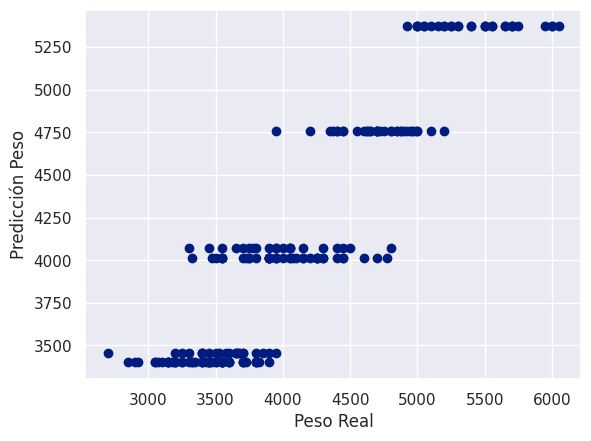

In [57]:
model1 = LinearRegression() #Modelo regresión lineal
model1.fit(X_train, y_train) #Modelo de entrenamiento
c = model1.intercept_
m = model1.coef_
y_pred_train = model1.predict(X_train) #Creamos entrenamiento
plt.scatter(y_train, y_pred_train)
plt.xlabel("Peso Real")
plt.ylabel("Predicción Peso")

In [58]:
r2_score(y_train, y_pred_train) #Vemos el valor del r2

0.8425961085025231

Text(0, 0.5, 'Predicción Peso')

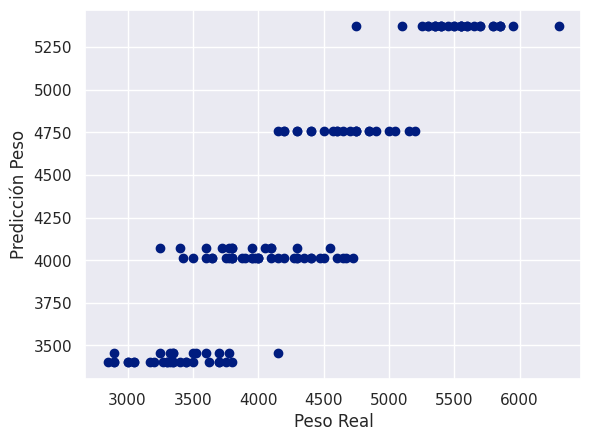

In [59]:
y_pred_test = model1.predict(X_test) #Como nuestro modelo nunca ha visto los datos de testeo, así que los ponemos para comparar
plt.scatter(y_test, y_pred_test)
plt.xlabel("Peso Real")
plt.ylabel("Predicción Peso") #Vemos que varían un poco pero se mantienen en su predicción

In [60]:
r2_score(y_test, y_pred_test) #Vemos el valor del r2, resulta ser incluso menor que el caso de entrenamiento

0.8451940250435024

In [61]:
model_1 = sm.OLS(y_train, sm.add_constant(X_train)).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            body_mass_g   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     425.9
Date:                Tue, 17 Oct 2023   Prob (F-statistic):           2.33e-93
Time:                        18:36:01   Log-Likelihood:                -1667.7
No. Observations:                 233   AIC:                             3343.
Df Residuals:                     229   BIC:                             3357.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              3390.7589     35.93

#2) body_mass_g = island + bill_length_mm + bill_depth_mm + flipper_length_mm + sex + e

In [62]:
Columns_to_drop2 = ['body_mass_g','species_Chinstrap','species_Gentoo']
X = penguins_df.drop(columns = Columns_to_drop2)  # Dejamos solo las variables independientes que nos interesan
y = penguins_df['body_mass_g']  # Variable Dependiente
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1) #Separamos para Testeo el 40% de los datos, dejamos semilla 1 para la aleatorización de
#los datos (así podemos estudiar resultados fijo sin que cambien cada vez que corra el código)

Text(0, 0.5, 'Predicción Peso')

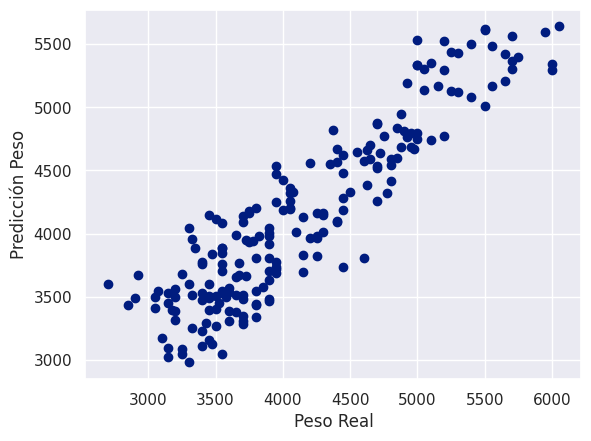

In [63]:
model2 = LinearRegression() #Modelo regresión lineal
model2.fit(X_train, y_train) #Modelo de entrenamiento
c = model2.intercept_
m = model2.coef_
y_pred_train = model2.predict(X_train) #Creamos entrenamiento
plt.scatter(y_train, y_pred_train)
plt.xlabel("Peso Real")
plt.ylabel("Predicción Peso")

In [64]:
r2_score(y_train, y_pred_train) #Vemos el valor del r2

0.8305948720089155

Text(0, 0.5, 'Predicción Peso')

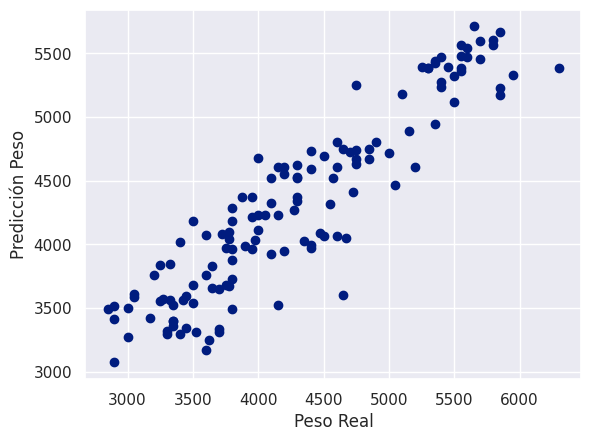

In [65]:
y_pred_test = model2.predict(X_test) #Como nuestro modelo nunca ha visto los datos de testeo, así que los ponemos para comparar
plt.scatter(y_test, y_pred_test)
plt.xlabel("Peso Real")
plt.ylabel("Predicción Peso") #Vemos que varían un poco pero se mantienen en su predicción

In [66]:
r2_score(y_test, y_pred_test) #Vemos el valor del r2, resulta ser incluso menor que el caso de entrenamiento

0.840591597521084

In [67]:
model_2 = sm.OLS(y_train, sm.add_constant(X_train)).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            body_mass_g   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     425.9
Date:                Tue, 17 Oct 2023   Prob (F-statistic):           2.33e-93
Time:                        18:36:29   Log-Likelihood:                -1667.7
No. Observations:                 233   AIC:                             3343.
Df Residuals:                     229   BIC:                             3357.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              3390.7589     35.93

#3) body_mass_g = island + bill_length_mm + bill_depth_mm + flipper_length_mm + e

In [68]:
Columns_to_drop3 = ['body_mass_g']
X = penguins_df.drop(columns = Columns_to_drop3)  # Dejamos solo las variables independientes que nos interesan
y = penguins_df['body_mass_g']  # Variable Dependiente
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1) #Separamos para Testeo el 40% de los datos, dejamos semilla 1 para la aleatorización de
#los datos (así podemos estudiar resultados fijo sin que cambien cada vez que corra el código)

Text(0, 0.5, 'Predicción Peso')

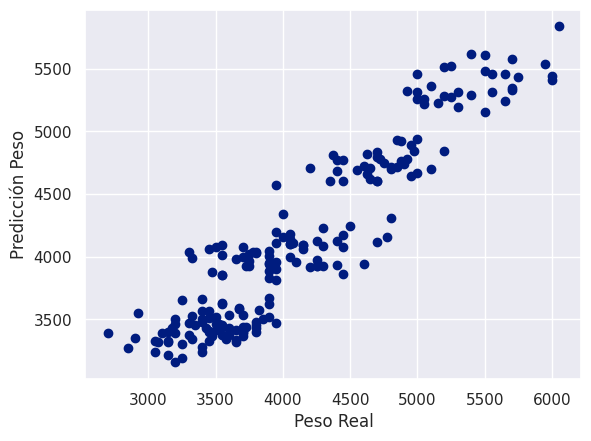

In [70]:
model3 = LinearRegression() #Modelo regresión lineal
model3.fit(X_train, y_train) #Modelo de entrenamiento
c = model3.intercept_
m = model3.coef_
y_pred_train = model3.predict(X_train) #Creamos entrenamiento
plt.scatter(y_train, y_pred_train)
plt.xlabel("Peso Real")
plt.ylabel("Predicción Peso")

In [71]:
r2_score(y_train, y_pred_train) #Vemos el valor del r2

0.8661516347070612

Text(0, 0.5, 'Predicción Peso')

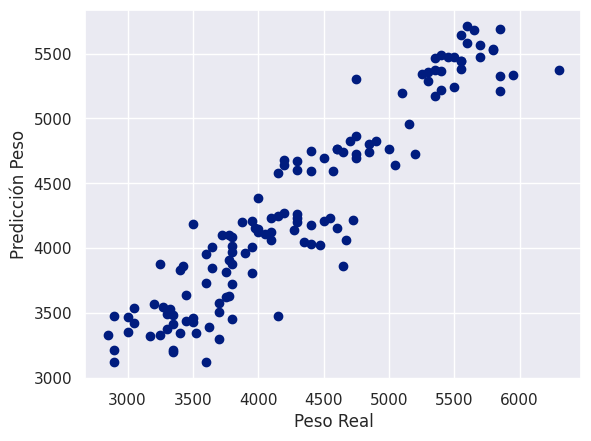

In [72]:
y_pred_test = model3.predict(X_test) #Como nuestro modelo nunca ha visto los datos de testeo, así que los ponemos para comparar
plt.scatter(y_test, y_pred_test)
plt.xlabel("Peso Real")
plt.ylabel("Predicción Peso") #Vemos que varían un poco pero se mantienen en su predicción

In [73]:
r2_score(y_test, y_pred_test) #Vemos el valor del r2, resulta ser incluso menor que el caso de entrenamiento

0.8763193611937659

In [74]:
model_3 = sm.OLS(y_train, sm.add_constant(X_train)).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            body_mass_g   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     425.9
Date:                Tue, 17 Oct 2023   Prob (F-statistic):           2.33e-93
Time:                        18:37:43   Log-Likelihood:                -1667.7
No. Observations:                 233   AIC:                             3343.
Df Residuals:                     229   BIC:                             3357.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              3390.7589     35.93

<font color='purple'>Fin experimento </font>

## <font color='blue'>__Ejercicios__</font>

### <font color='green'>__Actividad 1:__</font>

Para esta dinámica utilizaremos un set de datos de precios de diamantes (VD09.csv). La mayoría de las variables son auto explicativas a excepción de las variables `x`, `y`, `z`. Básicamente, estas variables hacen referencia al largo alto y ancho del diamante respectivamente. La idea es implementar la mayoría de los gráficos que hemos visto, con un par de diferencias:

1. Graficar la matriz de correlación para las distintas variables numéricas
2. Utilizando subplots genere 7 histogramas para las siguientes variables: carat, depth, table, price, x , y , z
3. Utilizando subplots genere 4 boxplots respetando las siguientes instrucciones:
    - Obtenga una muestra aleatoria del set de datos de los diamantes utilizando el método `diamonds_df.sample(100)`
    - Guarde esta muestra en una variable, utilícela para generar los gráficos
    - Genere los boxplots con una paleta de color pastel (puede que el parámetro `palette` puede ser de ayuda)
    - Para los dos primeros boxplots genere adicionalmente swarmplots para las mismas variables utilizadas que los boxplots (y el set de datos muestreado) **¿Surge algún warning de ejecución de codigo? ¿Que cree que pasaría si utilizara una muestra de 1000?**
    - Para los dos últimos boxplots, genere adicionalmente stripplots para las mismas variables utilizadas que los boxplots (y el set de datos muestreado) **¿Surge algún warning de ejecución de codigo?**
4. Utilizando subplots, genere 4 barplots
    - Cuente cuantos diamantes hay para cada corte (`cut`)
    - Cuente cuantos diamantes hay para cada color
    - Genere el gráfico de barras de precio promedio en relación con la claridad del diamante
    - Genere el gráfico de barras de precio acumulado total en relación a la claridad del diamante **¿Que función de numpy suma todos los elementos de un arreglo?**


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.__version__ # Revisamos que estemos en la ultima versión de seaborn
# Importamos las librerías adicionales para el manejo numérico y de DataFrame
import numpy as np
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
diamonds_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Análisis Exploratorio y Estadística/Clase 3/VD09.csv")
diamonds_df = diamonds_df.set_index(diamonds_df.columns[0]) #Transformamos la primera columna
#en índice para tener solo las variables en el dataframe como columnas a trabajar
diamonds_df.head()
# x = Largo
# y = Alto
# z = Ancho

,carat,cut,color,clarity,depth,table,price,x,y,z
Unnamed: 0,,,,,,,,,,
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
diamonds_df.tail()

,carat,cut,color,clarity,depth,table,price,x,y,z
Unnamed: 0,,,,,,,,,,
53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53940,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64


<ipython-input-23-18e3e9a37d79>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = diamonds_df.corr() # Obtenemos la matriz de correlación para las variables númericas del set de datos de pingüinos


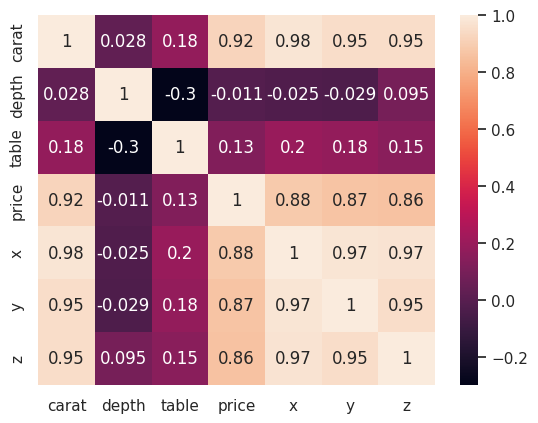

In [ ]:
#1. Graficar la matriz de correlación para las distintas variables numéricas##
corr = diamonds_df.corr() # Obtenemos la matriz de correlación para las variables númericas del set de datos de pingüinos
sns.heatmap(corr,annot=True) #Generamos el heatmap anotado
plt.show()

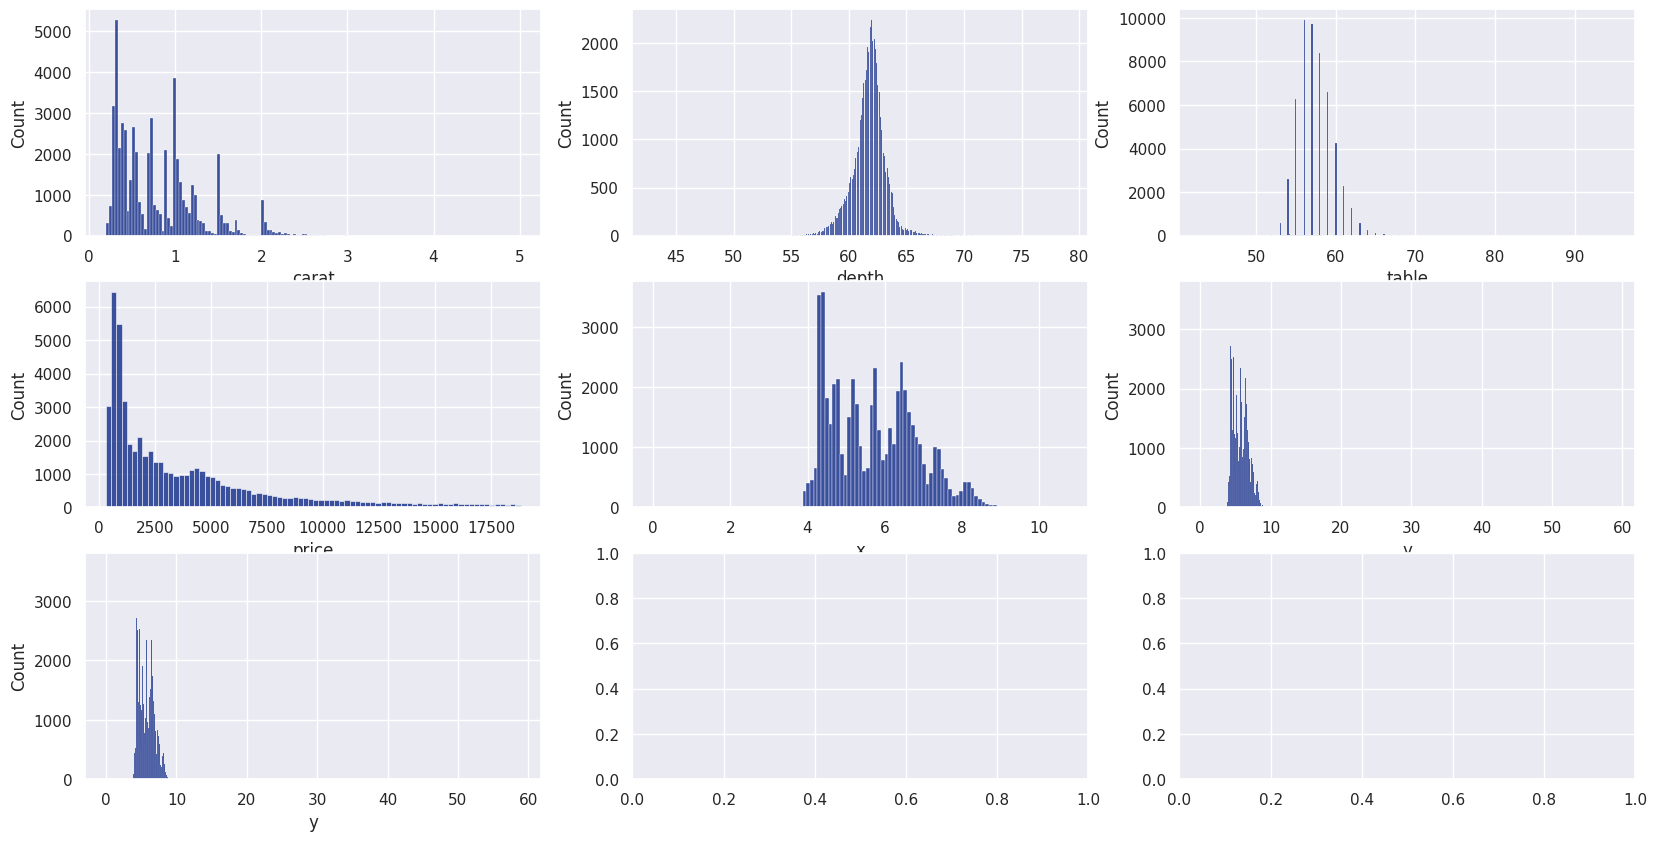

In [ ]:
#2. Utilizando subplots genere 7 histogramas para las siguientes variables: carat, depth, table, price, x , y , z
fig, ax = plt.subplots(3,3, figsize=(20,10) ) #Creamos una matriz de dimensión 3x3 para poner los 7 gráficos en una figura de tamaño 20,10
sns.histplot(x='carat', data = diamonds_df, ax = ax[0,0])
sns.histplot(x='depth', data = diamonds_df, ax = ax[0,1])
sns.histplot(x='table', data = diamonds_df, ax = ax[0,2])
sns.histplot(x='price', data = diamonds_df, ax = ax[1,0])
sns.histplot(x='x', data = diamonds_df, ax = ax[1,1])
sns.histplot(x='y', data = diamonds_df, ax = ax[1,2])
sns.histplot(x='y', data = diamonds_df, ax = ax[2,0])
plt.show()

#con este codigo se puede eliminar el ultimo grafico: 'fig.delaxes(axes[1, 3])'
#Con bins son la cantidad de barras

In [ ]:
#3. Utilizando subplots genere 4 boxplots respetando las siguientes instrucciones:

#3.1 - Obtenga una muestra aleatoria del set de datos de los diamantes utilizando el método `diamonds_df.sample(100)
#3.2 - Guarde esta muestra en una variable, utilícela para generar los gráficos
sample_diamonds_df = diamonds_df.sample(100, random_state=1) #Fijamos seed en 1
sample_diamonds_df

,carat,cut,color,clarity,depth,table,price,x,y,z
Unnamed: 0,,,,,,,,,,
2715,0.33,Ideal,H,SI1,61.7,55.0,564,4.43,4.46,2.74
14654,1.20,Ideal,I,VS2,62.1,57.0,5914,6.78,6.71,4.19
52761,0.62,Ideal,D,VS1,61.0,57.0,2562,5.51,5.54,3.37
48659,0.34,Good,H,VS2,63.1,56.0,537,4.41,4.46,2.80
14813,1.20,Ideal,E,SI2,62.5,55.0,5964,6.77,6.84,4.25
...,...,...,...,...,...,...,...,...,...,...
28796,0.27,Very Good,F,VVS2,61.8,56.0,682,4.19,4.20,2.60
2805,0.91,Premium,G,SI1,62.5,56.0,3262,6.30,6.18,3.90
45205,0.51,Very Good,G,VS1,62.7,56.0,1656,5.08,5.13,3.20


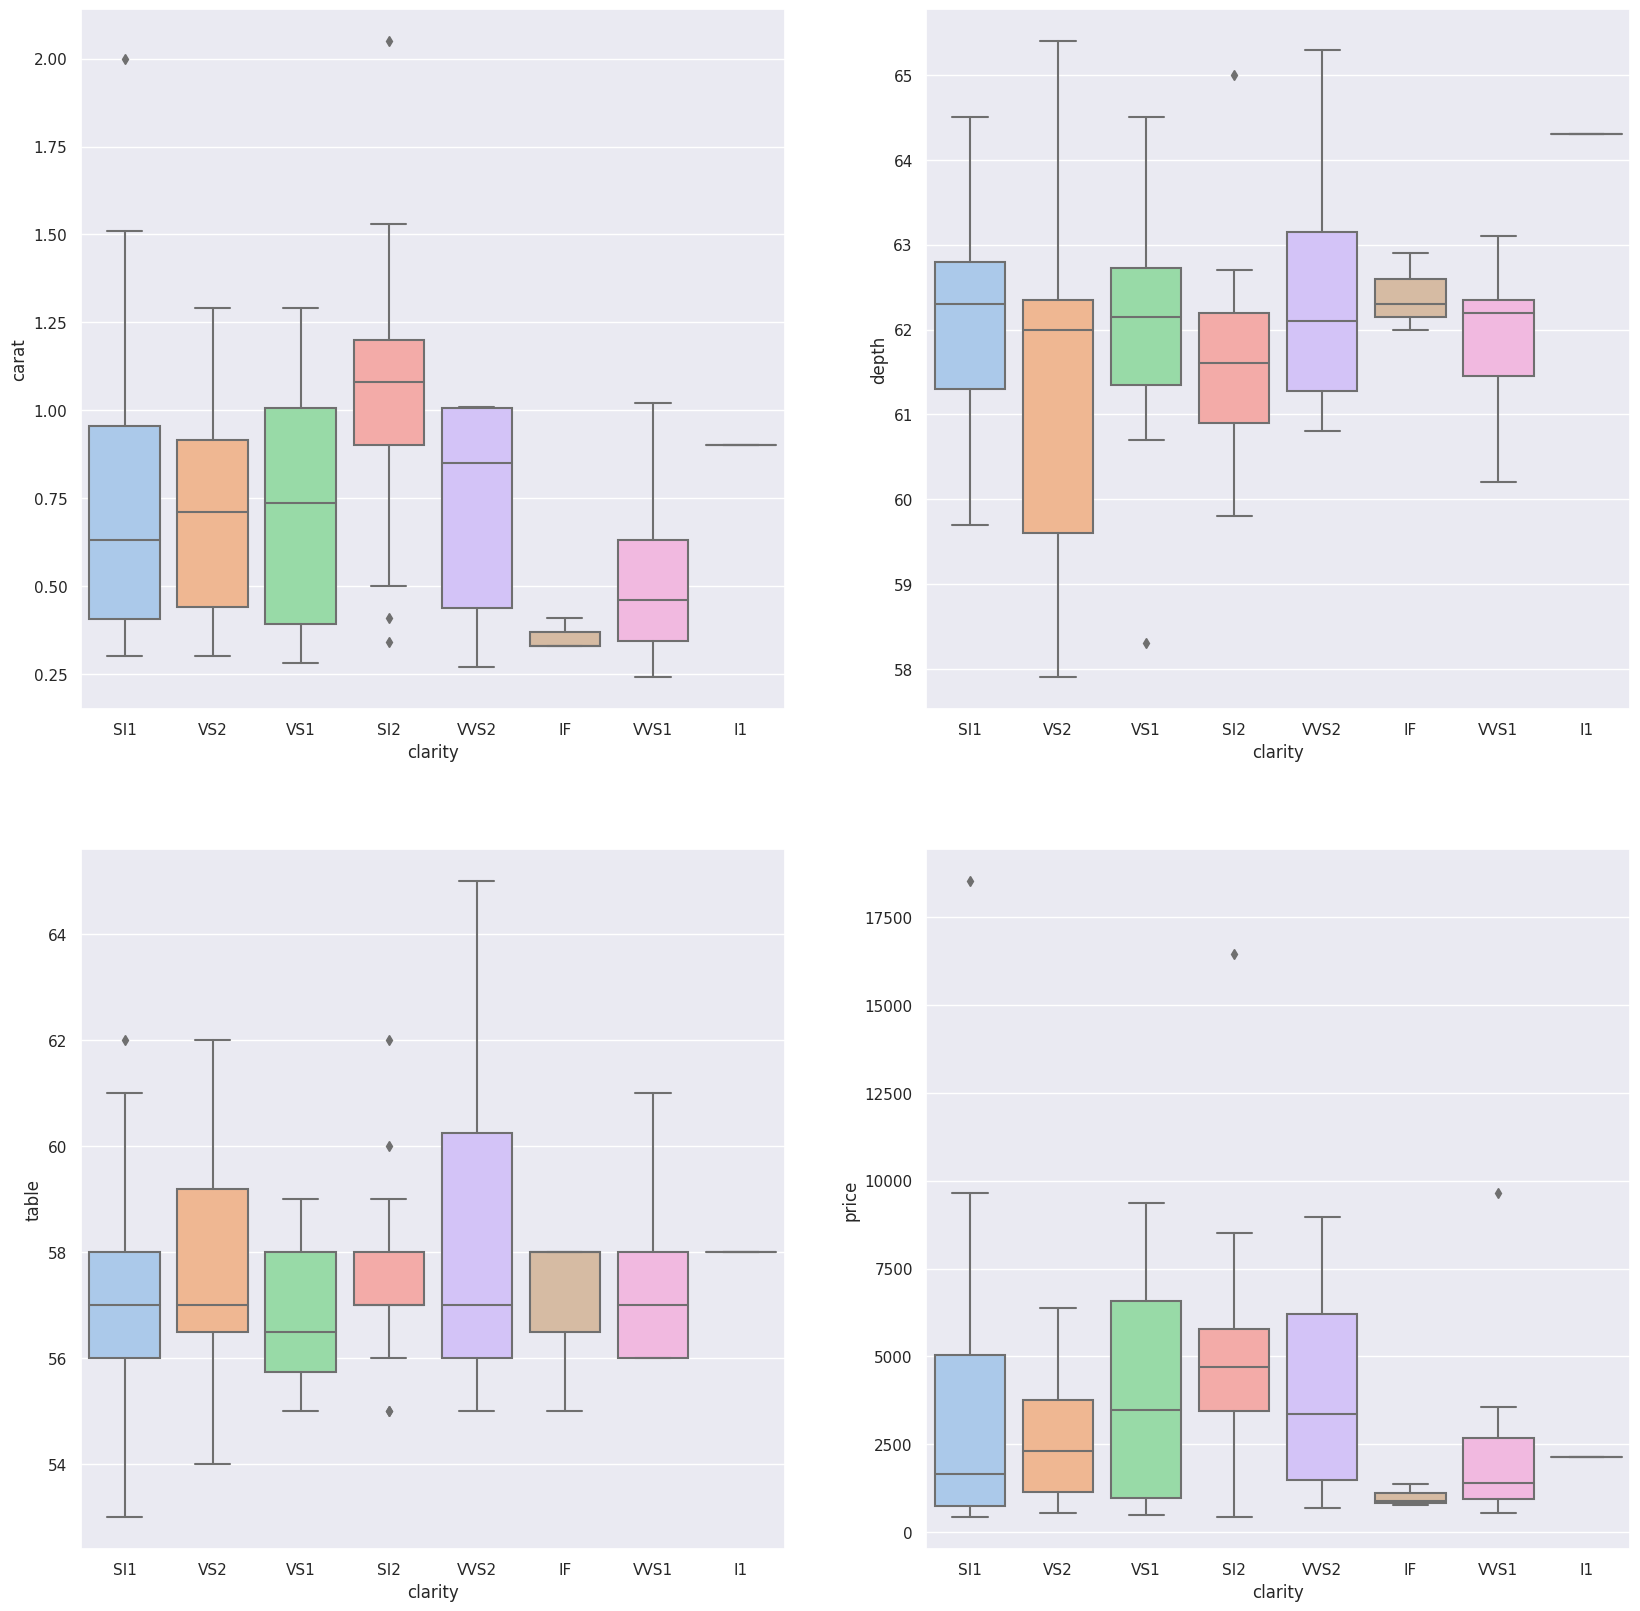

In [ ]:
#3.3 - Genere los boxplots con una paleta de color pastel (puede que el parámetro `palette` puede ser de ayuda)
fig, ax = plt.subplots(2,2, figsize=(20,20) )
sns.set_palette("pastel") # Opciones de paletas de colores: "Deep", "Muted", "Bright","Pastel","Dark","Colorblind"
sns.boxplot(x='clarity', y='carat', data = sample_diamonds_df, ax = ax[0,0])
sns.boxplot(x='clarity', y='depth', data = sample_diamonds_df, ax = ax[0,1])
sns.boxplot(x='clarity', y='table', data = sample_diamonds_df, ax = ax[1,0])
sns.boxplot(x='clarity', y='price', data = sample_diamonds_df, ax = ax[1,1])

plt.show()

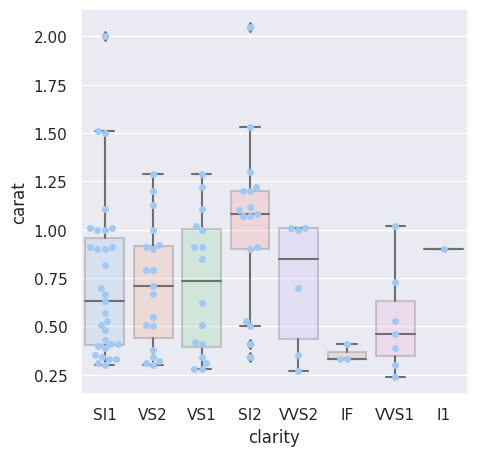

In [ ]:
#3.4 - Para los dos primeros boxplots genere adicionalmente swarmplots para las mismas variables utilizadas que los boxplots (y el set de datos muestreado) **¿Surge algún warning de ejecución de codigo? ¿Que cree que pasaría si utilizara una muestra de 1000?**
#3.4.1
plt.figure(figsize=(5,5))
ax = sns.boxplot(x='clarity', y='carat', data = sample_diamonds_df, boxprops=dict(alpha=0.3))
ax = sns.swarmplot(x='clarity', y='carat', data = sample_diamonds_df)
plt.show()



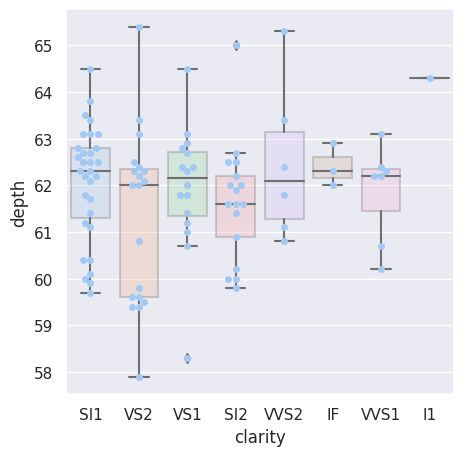

In [ ]:
#3.4.2
plt.figure(figsize=(5,5))
ax = sns.boxplot(x='clarity', y='depth', data = sample_diamonds_df, boxprops=dict(alpha=0.3))
ax = sns.swarmplot(x='clarity', y='depth', data = sample_diamonds_df)
plt.show()

Para los casos anteriores no arrojó ninguna advertencia para la muestra de 100 datos, pero al realizar con la muestra de 1000 datos arrojaba "UserWarning: x.x% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot".

Esto quiere decir que una parte importante de los puntos no fueron posibles de graficar por las especificaciones del gráfico, el código sugiere reducir el tamaño de los marcadores o usar "stripplot"

El cual es usado para mostrar puntos de datos en un solo eje, haciendolo últil para visualizar distribución de data continua entre variables categóricas.
REALIZA UN MUESTREO QUE MANTENTIENE LA ESTRUCTURA DE LOS DATOS, NO SOLO LOS SACAN AL AZAR

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 33.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 25.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 18.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 11.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 13.4% of the points cannot be plac

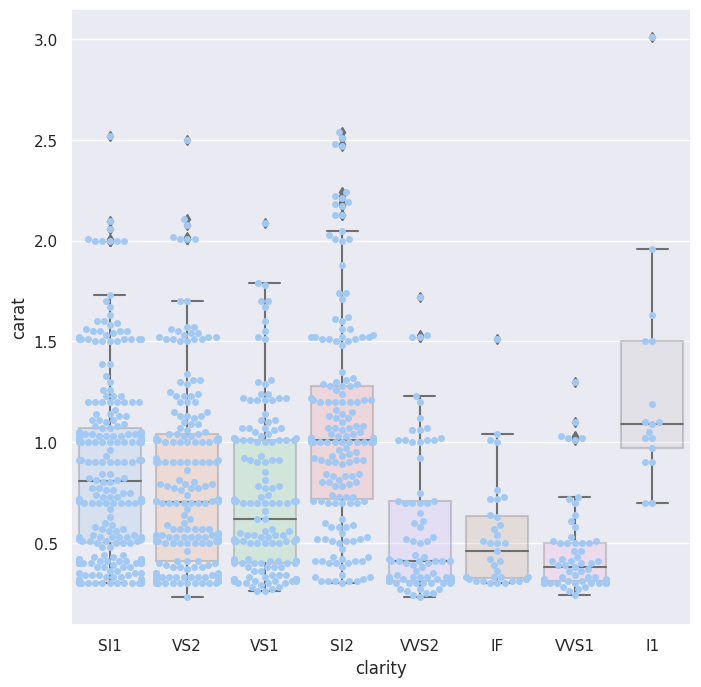

In [ ]:
sample2_diamonds_df = diamonds_df.sample(1000, random_state=1) #Fijamos seed en 1
sample2_diamonds_df

plt.figure(figsize=(8,8))
ax = sns.boxplot(x='clarity', y='carat', data = sample2_diamonds_df, boxprops=dict(alpha=0.3))
ax = sns.swarmplot(x='clarity', y='carat', data = sample2_diamonds_df)
plt.show()

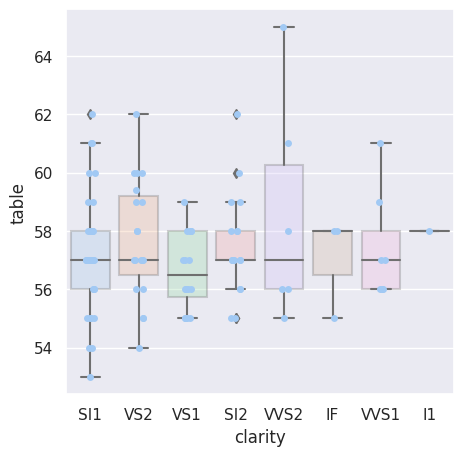

In [ ]:
#3.5 - Para los dos últimos boxplots, genere adicionalmente stripplot para las mismas variables utilizadas que los boxplots (y el set de datos muestreado) **¿Surge algún warning de ejecución de codigo?**

plt.figure(figsize=(5,5))
ax = sns.boxplot(x='clarity', y='table', data = sample_diamonds_df, boxprops=dict(alpha=0.3))
ax = sns.stripplot(x='clarity', y='table', data = sample_diamonds_df)
plt.show()


#ax.set_title("Título", y=1.05)  # Ajusta el 1.05 según lo que necesites
#plt.subplots_adjust(hspace=0.5, wspace=0.5)  # Ajusta los valores según lo que necesites

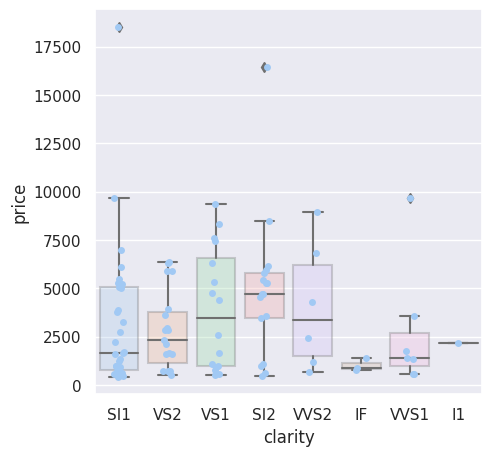

In [ ]:
plt.figure(figsize=(5,5))
ax = sns.boxplot(x='clarity', y='price', data = sample_diamonds_df, boxprops=dict(alpha=0.3))
ax = sns.stripplot(x='clarity', y='price', data = sample_diamonds_df)
plt.show()

Esta vez para los casos anteriores no arrojó ninguna advertencia al utilizar stripplot.

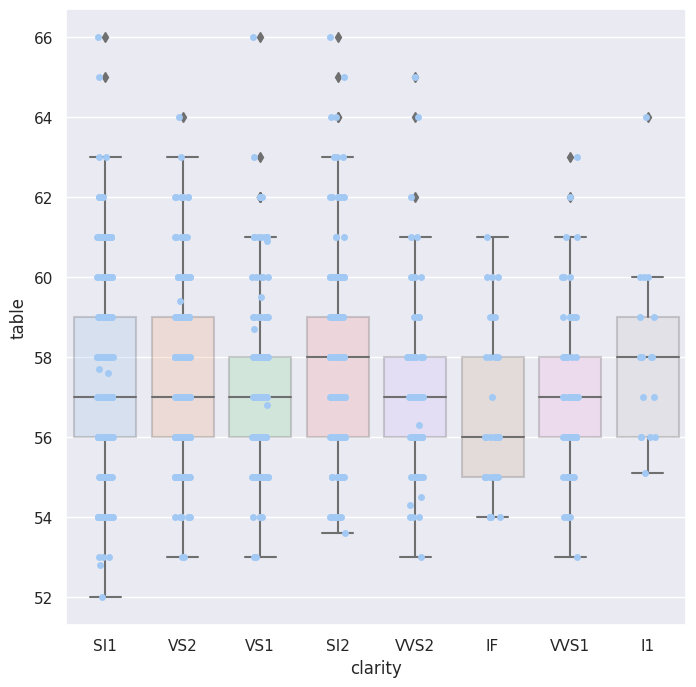

In [ ]:
sample2_diamonds_df = diamonds_df.sample(1000, random_state=1) #Fijamos seed en 1
sample2_diamonds_df

plt.figure(figsize=(8,8))
ax = sns.boxplot(x='clarity', y='table', data = sample2_diamonds_df, boxprops=dict(alpha=0.3))
ax = sns.stripplot(x='clarity', y='table', data = sample2_diamonds_df)
plt.show()

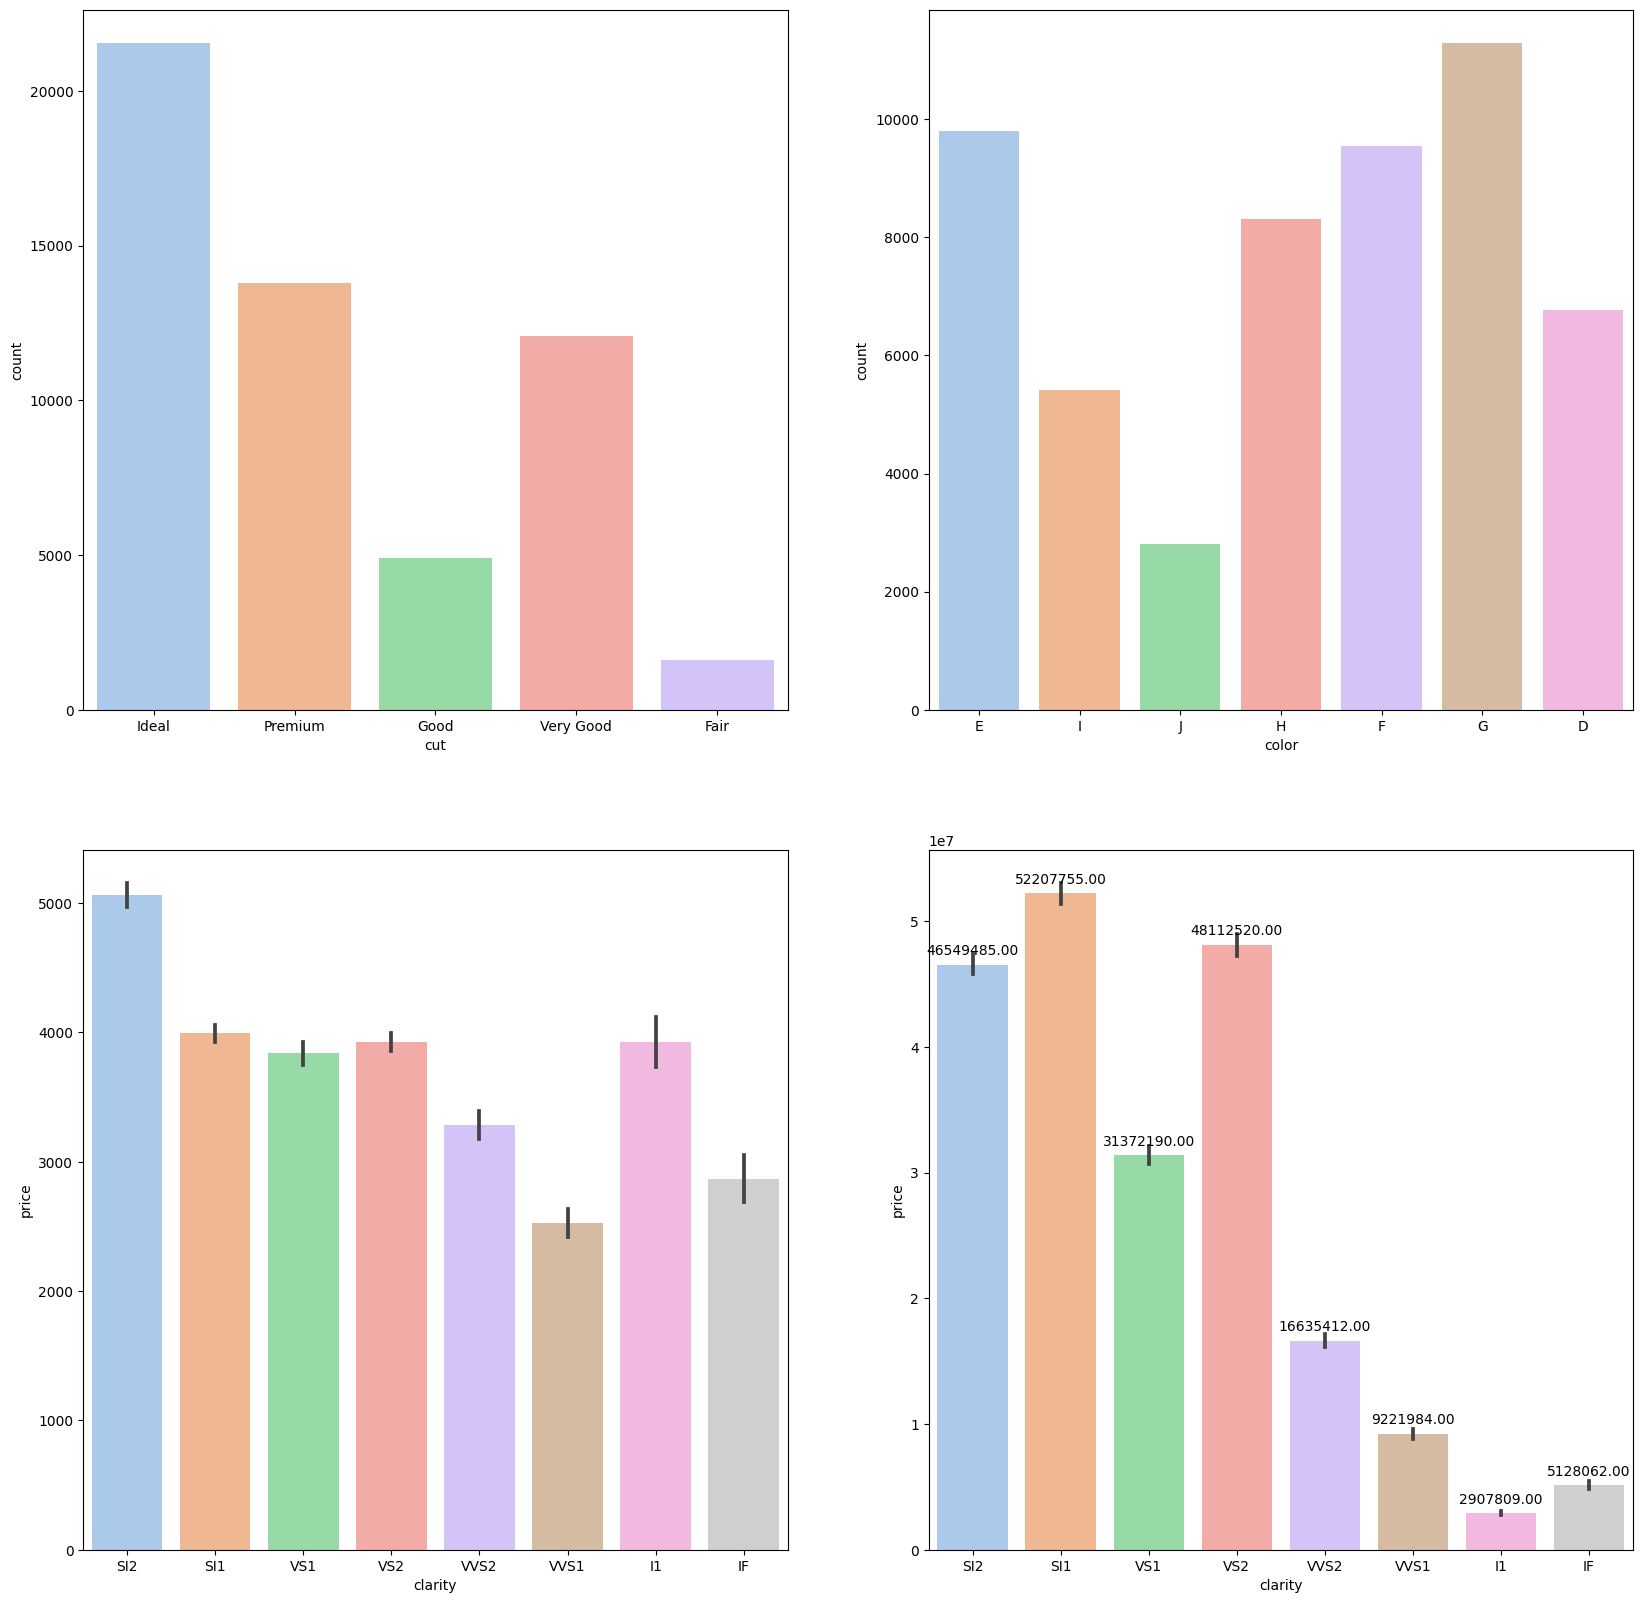

In [ ]:
#4. Utilizando subplots, genere 4 barplots
fig, ax = plt.subplots(2,2, figsize=(20,20) )
#4.1  - Cuente cuantos diamantes hay para cada corte (`cut`)
sns.countplot(x='cut', data=diamonds_df, ax = ax[0,0])
#4.2  - Cuente cuantos diamantes hay para cada color
sns.countplot(x='color', data = diamonds_df, ax = ax[0,1])
#4.3  - Genere el gráfico de barras de precio promedio en relación con la claridad del diamante
sns.barplot(x='clarity', y ='price', estimator=np.mean, data=diamonds_df, ax = ax[1,0])
#4.4  - Genere el gráfico de barras de precio acumulado total en relación a la claridad del diamante **¿Que función de numpy suma todos los elementos de un arreglo?**
sns.barplot(x='clarity', y ='price', estimator=np.sum, data=diamonds_df, ax = ax[1,1])

ax = plt.gca() #Llamamos al eje y
for p in ax.patches: # Añade texto con el número real en la cima de cada barra
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 10),
                textcoords='offset points')

plt.show()

<font color='green'>Fin actividad 1</font>